In [37]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [38]:
wcat=pd.read_csv('wc-at.csv')
wcat

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84
...,...,...
104,100.10,124.00
105,93.30,62.20
106,101.80,133.00
107,107.90,208.00


In [60]:
# her waist is our independent variable and 'at' is our dependent  variable 

In [40]:
wcat.shape

(109, 2)

In [41]:
wcat.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [42]:
wcat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Waist   109 non-null    float64
 1   AT      109 non-null    float64
dtypes: float64(2)
memory usage: 1.8 KB


In [43]:
numeric_data=wcat.select_dtypes(include=['float64','float64'])

In [44]:
plt.boxplot(wcat.waist)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'waist'

In [17]:
wcat.columns

Index(['Waist', 'AT'], dtype='object')

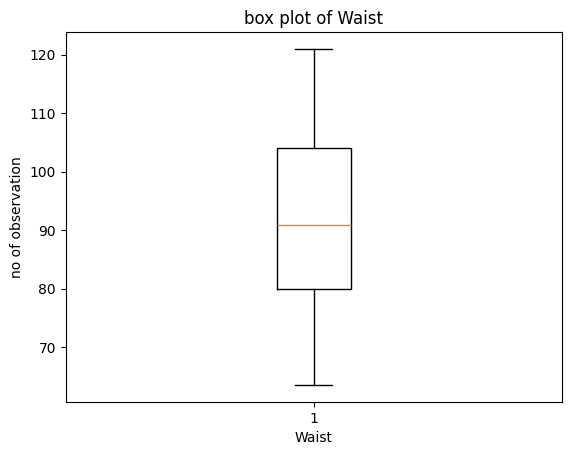

In [50]:
plt.boxplot(wcat.Waist)
plt.xlabel("Waist")
plt.ylabel("no of observation")
plt.title("box plot of Waist")
plt.show()

Text(0.5, 1.0, 'box plot at AT')

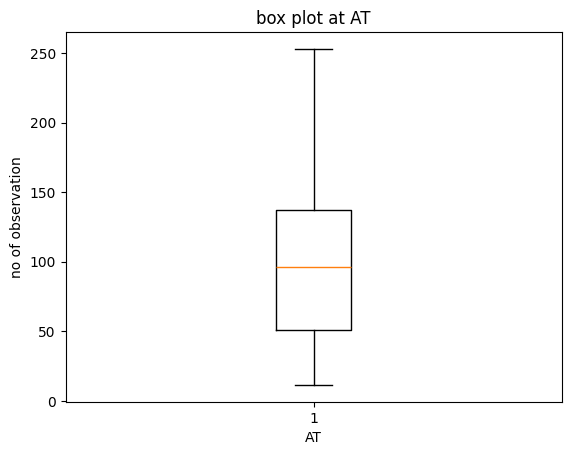

In [52]:
plt.boxplot(wcat.AT)
plt.xlabel("AT")
plt.ylabel("no of observation")
plt.title("box plot at AT")

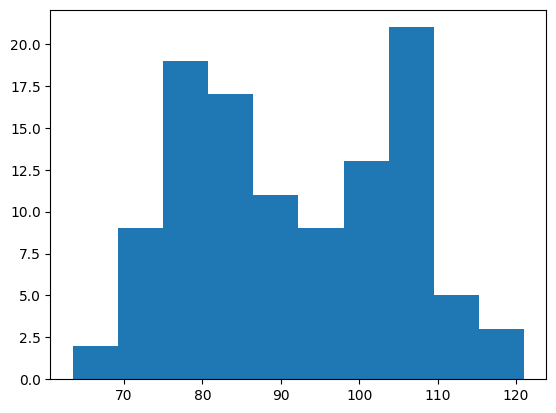

In [46]:
plt.hist(wcat.Waist)
plt.show()

Help on function plot in module matplotlib.pyplot:

plot(*args: 'float | ArrayLike | str', scalex: 'bool' = True, scaley: 'bool' = True, data=None, **kwargs) -> 'list[Line2D]'
    Plot y versus x as lines and/or markers.

    Call signatures::

        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

    The coordinates of the points or line nodes are given by *x*, *y*.

    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.

    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses

    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line pro

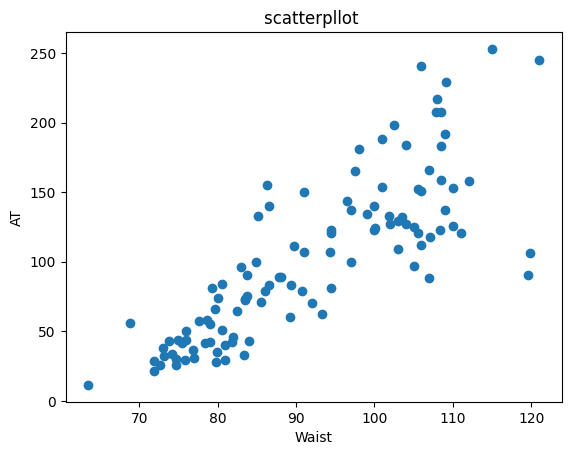

In [53]:
plt.scatter(wcat.Waist,wcat.AT)
plt.xlabel("Waist")
plt.ylabel("AT")
plt.title("scatterpllot ")
help(plt.plot)

In [54]:
wcat.corr()

,Waist,AT
Waist,1.000000,0.818558
AT,0.818558,1.000000


In [56]:
# from above correlation we got a very strong co relation of 0.81 between waist and at 

In [57]:
# now start buldiing ur model 
import statsmodels.formula.api as smf 

In [58]:
model=smf.ols("AT~Waist",data=wcat).fit()
model.params

Intercept   -215.981488
Waist          3.458859
dtype: float64

In [59]:
# from the above code wher fit() is used to fit the model ,model.params: This returns the coefficients of the regression model

In [61]:
# from the outout we get b0=108.237 and b1=3.4588

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     217.3
Date:                Mon, 03 Feb 2025   Prob (F-statistic):           1.62e-27
Time:                        13:01:08   Log-Likelihood:                -534.99
No. Observations:                 109   AIC:                             1074.
Df Residuals:                     107   BIC:                             1079.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -215.9815     21.796     -9.909      0.000    -259.190    -172.773
Waist          3.4589      0.235     14.740      0.000       2.994       3.924
==============================================================================
Omnibus:                        3.960   Durbin-Watson:                   1.560
Prob(Omnibus):                  0.138   Jarque-Bera (JB):                4.596
Skew:                           0.104   Prob(JB):                        0.100
Kurtosis:                       3.984   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
# now we do predictions 
pred=model.predict(wcat.Waist)
pred

0       42.568252
1       35.131704
2       66.953210
3       74.389758
4       42.222366
          ...    
104    130.250337
105    106.730093
106    136.130398
107    157.229440
108    159.304756
Length: 109, dtype: float64

In [65]:
model.resid # resid will give u all the errors in the model 


0     -16.848252
1      -9.241704
2     -24.353210
3     -31.589758
4     -12.382366
         ...    
104    -6.250337
105   -44.530093
106    -3.130398
107    50.770560
108    48.695244
Length: 109, dtype: float64

In [67]:
# so the above values are the errors for indivudalu values 
# to find the overall error 


In [68]:
 # the measurement we are going to use is "root means square error " so error=actualvalue - predicted value  then take saquare of error and mean of error 

In [71]:
rmse_line=np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred))**2))
rmse_line

np.float64(32.760177495755144)

In [72]:
# the above is rmse vale of model-1 only for linear model after try to vizualize the data 
# sqrt means square root and 

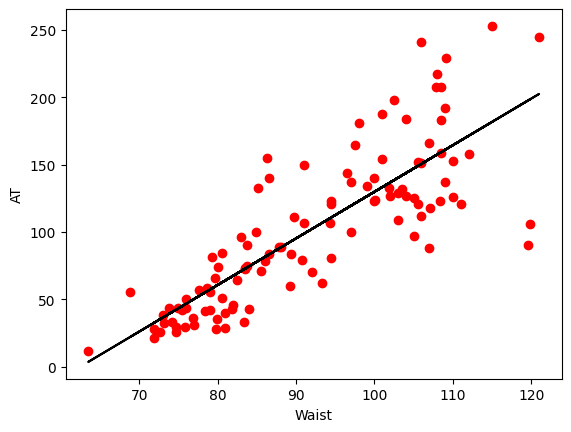

In [74]:
plt.scatter(x=wcat['Waist'], y=wcat['AT'], color='red')
plt.plot(wcat['Waist'], pred, color='black')
plt.xlabel('Waist')
plt.ylabel('AT')
plt.show()


In [75]:
# to improve r**2 values we have difffernt types which helps in transformation of r**2 values 
# 1. log transformation 
# 2. exponential transformation
# 3. square transformation
# 4.log+ square transformation 

In [76]:
 # we are using log transformation so that our equation is y=b0+b1  after log transformation y = b0+b1*log(x)

In [78]:
model2=smf.ols("AT~np.log(Waist)",data=wcat).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     AT   R-squared:                       0.675
Model:                            OLS   Adj. R-squared:                  0.672
Method:                 Least Squares   F-statistic:                     222.6
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           6.80e-28
Time:                        03:44:33   Log-Likelihood:                -534.11
No. Observations:                 109   AIC:                             1072.
Df Residuals:                     107   BIC:                             1078.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1328.3420     95.923    -13.848      0.000   -1518.498   -1138.186
np.log(Waist)   317.1356     21.258     14.918      0.000     274.994     359.277
==============================================================================
Omnibus:                        3.317   Durbin-Watson:                   1.599
Prob(Omnibus):                  0.190   Jarque-Bera (JB):                2.908
Skew:                           0.235   Prob(JB):                        0.234
Kurtosis:                       3.647   Cond. No.                         145.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
# after using log transformaton r**2 value is slightly increased from 0.6070 to 0.675 

In [81]:
pred2=model2.predict(pd.DataFrame(wcat['Waist']))
pred2

0       39.828156
1       30.572779
2       68.410960
3       76.638769
4       39.403610
          ...    
104    132.438233
105    110.127880
106    137.778929
107    156.234559
108    157.993171
Length: 109, dtype: float64

In [82]:
# now have to find the rmse value of this model 

In [84]:
rmse_log=np.sqrt(np.mean((np.array(wcat['AT'])-np.array(pred2))**2))
rmse_log

np.float64(32.49688490932125)

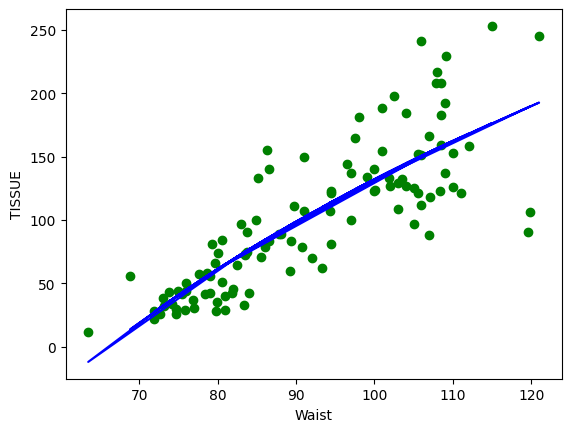

In [86]:
plt.scatter(x=wcat['Waist'], y=wcat['AT'], color='green')
plt.plot(wcat['Waist'], pred2, color='blue')
plt.xlabel('Waist')
plt.ylabel('TISSUE')
plt.show()

In [87]:
# so u did not achive required r**2 value so we have ti try another transformatiom 
# next is exponential transformation

In [92]:
# exponential transformation 
model3=smf.ols('np.log(AT)~Waist',data=wcat).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             np.log(AT)   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     258.3
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           2.68e-30
Time:                        04:20:42   Log-Likelihood:                -40.123
No. Observations:                 109   AIC:                             84.25
Df Residuals:                     107   BIC:                             89.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7410      0.233      3.185      0.002       0.280       1.202
Waist          0.0403      0.003     16.073      0.000       0.035       0.045
==============================================================================
Omnibus:                        2.604   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.272   Jarque-Bera (JB):                2.117
Skew:                          -0.329   Prob(JB):                        0.347
Kurtosis:                       3.182   Cond. No.                         639.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""